<a href="https://colab.research.google.com/github/JungJaeseoung/machine-learning/blob/main/jason_rectangle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Hello World')

Hello World


In [ ]:
import requests

In [ ]:
image_url = 'https://imgnn.seoul.co.kr/img/upload/2017/06/27/SSI_20170627151849_V.jpg'

In [ ]:
from PIL import Image
from io import BytesIO

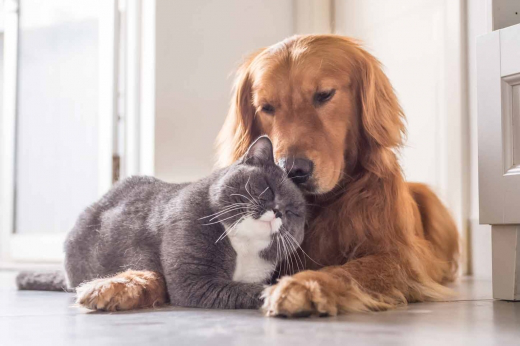

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [ ]:
key = '6c67d613dc514e13901c527c684cf0ee'
endpoint = 'https://labuser3cv.cognitiveservices.azure.com/'

In [ ]:
endpoint = endpoint + 'vision/v2.0/'

In [ ]:
analyzeEndpoint = endpoint + 'analyze'

In [ ]:
headers = {'Ocp-Apim-Subscription-Key': key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [ ]:
response = requests.post(analyzeEndpoint, headers=headers, params=params,json=data)

In [ ]:
result=response.json()

In [ ]:
result['description']['captions'][0]['text']

'a large brown dog lying next to a cat'

In [ ]:
detectEndpoint = endpoint + 'detect'

In [ ]:
response = requests.post(detectEndpoint,headers=headers, params=params, json=data)

In [ ]:
response.json()

{'objects': [{'rectangle': {'x': 208, 'y': 35, 'w': 256, 'h': 284},
   'object': 'golden retriever',
   'confidence': 0.711,
   'parent': {'object': 'retriever',
    'confidence': 0.817,
    'parent': {'object': 'dog',
     'confidence': 0.841,
     'parent': {'object': 'mammal',
      'confidence': 0.912,
      'parent': {'object': 'animal', 'confidence': 0.912}}}}},
  {'rectangle': {'x': 39, 'y': 145, 'w': 291, 'h': 170},
   'object': 'cat',
   'confidence': 0.767,
   'parent': {'object': 'mammal',
    'confidence': 0.835,
    'parent': {'object': 'animal', 'confidence': 0.837}}}],
 'requestId': '3706fc07-e13f-4bcc-91f7-86416f2a4ac2',
 'metadata': {'height': 346, 'width': 520, 'format': 'Jpeg'}}

In [ ]:
result = response.json()

In [ ]:
def MakeRetangle(result):
  objects = result['objects']
  for obj in objects :
    print(obj)

    rect = obj['rectangle']
    print(rect)
    x= rect['x']
    y=rect['y']
    w=rect['w']
    h=rect['h']

    draw.rectangle(((x,y),(x+w,y+h)),outline='red')

    objectName = obj['object']
    draw.text((x,y),objectName, fill='red')

In [ ]:
MakeRetangle(result)

{'rectangle': {'x': 208, 'y': 35, 'w': 256, 'h': 284}, 'object': 'golden retriever', 'confidence': 0.711, 'parent': {'object': 'retriever', 'confidence': 0.817, 'parent': {'object': 'dog', 'confidence': 0.841, 'parent': {'object': 'mammal', 'confidence': 0.912, 'parent': {'object': 'animal', 'confidence': 0.912}}}}}
{'x': 208, 'y': 35, 'w': 256, 'h': 284}
{'rectangle': {'x': 39, 'y': 145, 'w': 291, 'h': 170}, 'object': 'cat', 'confidence': 0.767, 'parent': {'object': 'mammal', 'confidence': 0.835, 'parent': {'object': 'animal', 'confidence': 0.837}}}
{'x': 39, 'y': 145, 'w': 291, 'h': 170}


In [ ]:
from PIL import Image, ImageDraw, ImageFont
draw = ImageDraw.Draw(image)

In [ ]:
MakeRetangle(result)

{'rectangle': {'x': 208, 'y': 35, 'w': 256, 'h': 284}, 'object': 'golden retriever', 'confidence': 0.711, 'parent': {'object': 'retriever', 'confidence': 0.817, 'parent': {'object': 'dog', 'confidence': 0.841, 'parent': {'object': 'mammal', 'confidence': 0.912, 'parent': {'object': 'animal', 'confidence': 0.912}}}}}
{'x': 208, 'y': 35, 'w': 256, 'h': 284}
{'rectangle': {'x': 39, 'y': 145, 'w': 291, 'h': 170}, 'object': 'cat', 'confidence': 0.767, 'parent': {'object': 'mammal', 'confidence': 0.835, 'parent': {'object': 'animal', 'confidence': 0.837}}}
{'x': 39, 'y': 145, 'w': 291, 'h': 170}


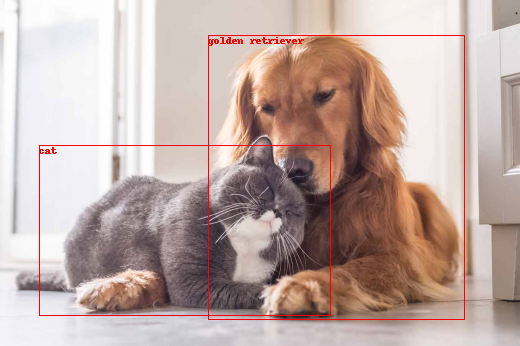

In [ ]:
image